# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**: провести исследовательский анализ данных.

**Ход исследования**:
1. Обзор данных
2. Предобработка данных
3. Дополнение данных расчётными
4. Исследовательский анализ данных

**Используемые библиотеки**:
1. pandas
2. matplotlib.pyplot
3. sklearn
4. numpy
5. seaborn
6. re

## Изучение данных из файла

Подключение библиотек, необходимых для исследования:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import re

Импорт данных. Для этого будет использована функция `read_csv()` для данных с разделителем '\t':

In [33]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Для начала исследования необходимо провести обзор данных. Воспользуемся методами `head()`, `info()` и `describe()`.

In [34]:
display(df.head(10))
df.info()
display(df.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В таблице 22 столбца с различными типами данных и 23699 строк. Согласно документации к набору данных:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Обзорная оценка данных позволяет обнаружить в данных несколько очевидных проблем:
1. Во многих столбцах таблицы имеются пропуски.
2. В некоторых столбцах присутствуют значения, которые требуют дополнительной проверки:
    * 0 в airports_nearest и в rooms
    * 1 в ceiling_height
    * 2 в living_area
    * значения около единицы в kitchen_area
3. У некоторых стобцов некорректный тип данных:
    * В столбце is_apartment предполагается тип данных boolean, однако из-за наличия пропусков столбец имеет тип данных - object
    * В столбцах balcony, floors_total, parks_around3000, ponds_around3000, days_exposition предполагается тип данных integer, столбец имеет тип данных float



Дополнительно проверим данные на наличие дубликатов:

In [36]:
print(f'Количество дубликатов: {df.duplicated().sum()}')

Количество дубликатов: 0


Введем дополнительный столбец с названием suspect для того, чтобы маркировать подозрительные объявления:

In [37]:
df['suspect'] = False

### Вывод

После обзора данных можно сделать вывод, что данные являются достаточными для проведения исследовательского анализа, однако требуют предварительной обработки, для того, чтобы некорректные данные не исказили результаты исследования. Дубликатов не обнаружено.

## Предобработка данных

### Обработка пропусков

Для начала необходимо посмотреть, какое количество пропущенных значений в каждом столбце:

In [38]:
df_na_stat = pd.concat([df.isna().sum(), round(df.isna().mean(), 4) * 100], axis=1)
df_na_stat.columns = ['Number of NA', '% of NA']
df_na_stat

,Number of NA,% of NA
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
floor,0,0.00
is_apartment,20924,88.29


Пропусков в данных довольно много (присутствуют столбцы с более чем 60% пропусков). Также легко заметить, что большая часть пропущенных значений сосредоточена в значениях стобцов, которые получены автоматически на основе картографических данных.

Начнем обработку пропусков с картографических данных:

In [39]:
df.loc[:, 'locality_name':'ponds_nearest'].head(15)

,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0
5,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN
6,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN
7,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN
8,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN
9,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN


Природа данных пропусков носит исключительно технический характер (например, наблюдался сбой в интеграции карт и сервиса недвижимости). 

Очевидно, что удалять строки с такими пропусками нельзя, потому что они содержат в себе очень большой набор прочей информации.

Пропуски в столбце locality_name заменим строкой "локация не определена".

In [40]:
df['locality_name'].fillna('локация не определена', inplace = True)

Между парами столбцов parks_around3000 - parks_nearest и ponds_around3000 - ponds_nearest наблюдается следущющая зависимость. Там, где parks/ponds_around3000 равно нулю, parks/ponds_nearest пропущено. Соответственно можно предположить обратную зависимость: если значение в parks/ponds_nearest пропущено, то parks/ponds_around3000 можно считать равным нулю. 

Однако, для начала, данную зависимость следует изучить подробнее:

In [41]:
print(df.query('parks_around3000 == 0')['parks_nearest'].value_counts())
print(df.query('ponds_around3000 == 0')['ponds_nearest'].value_counts())

3190.0    2
3064.0    1
3013.0    1
Name: parks_nearest, dtype: int64
Series([], Name: ponds_nearest, dtype: int64)


Действительно, зависимость имеется, причём те непропущенные значения, которые имеются для parks_nearest являются скорее исключением, поэтому будет корректно заполнить пропуски в parks/ponds_around3000 нулями.

In [42]:
df['parks_around3000'].fillna(0, inplace = True)
df['ponds_around3000'].fillna(0, inplace = True)

Пропуски в parks/ponds_nearest лучше проигнорировать, потому что замена на среднее/медианное значение будет некорректно по смыслу, а замена на любое значение больше 3000 почти 66% данных сильно исказит итоговый результат.

Пропуски в cityCenters_nearest объяснить довольно просто: данные объявления не относятся к населенному пункту типа "город", поэтому значения пропущены, так как нет точки, относительно которой считать расстояние. Данные пропуски будут игнорироваться, так как нет определенного расчётного значения, замена на которое бы корректно отразила данную величину. Можно обратить внимание, что количество пропусков в столбцах cityCenters_nearest и airports_nearest примерно одинаковое. Данные пропуски по своим причинам очень похожи (аэропорты слишком далеко от данных населенных пунктов), поэтому пропуски в airports_nearest также будут игнорироваться без замены.

Пропуски, которые находятся в картографических данных обработаны.

Теперь с особой внимательностью надо обработать столбцы, в которых пользователи заполняли значения вручную. 

В столбце ceiling_height присутствуют пропущенные значения.

Пропущенных значений высоты потолка очень много (почти 40% всего объема данных), поэтому заполнение пропусков не представляется возможным, так как может сильно исказить итоговые результаты исследования. Вероятнее всего, данные значения не были заполнены пользователями при публикации объявления.

В столбце floors_total всего 86 пропущенных значений. Необходимо изучить строки с такими значениями:

In [43]:
df.loc[df.floors_total.isna(), 'total_images':'balcony'].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0


Явной взаимосвязи с другими столбцами не прослеживается, поэтому заменим все пропуски в данном столбце максимальным значением этажей в таблице, чтобы исключить ситуацию, когда значение floor будет выше значения floors_total.

In [44]:
df['floors_total'].fillna(df['floors_total'].max(), inplace=True)

Далее рассмотрим столбцы living_area и kitchen_area. В данных столбцах не более 10% пропущенных значений. Для заполнения пропусков построим линейную регрессионную модель, на основании которой заполним недостающие значения:

In [45]:
total_area_np = np.array(df[(~df.total_area.isna()) & (~df.living_area.isna())].total_area).reshape(-1,1)
living_area_np = np.array(df[(~df.total_area.isna()) & (~df.living_area.isna())].living_area)
total_area_for_predict = np.array(df.total_area).reshape(-1,1)
model_living_area = LinearRegression().fit(total_area_np, living_area_np)
df['living_area_predict'] = model_living_area.predict(total_area_for_predict)
df.loc[df['living_area'].isna(), 'living_area'] = df.loc[df.living_area.isna(), 'living_area_predict']
df.drop('living_area_predict', axis=1, inplace=True)

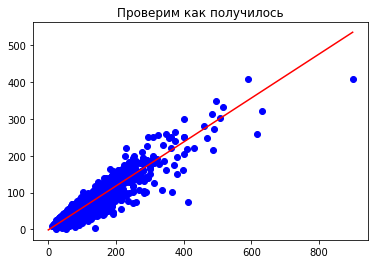

In [46]:
plt.title('Проверим как получилось')
plt.scatter(total_area_np, living_area_np, color='b', marker='o')
plt.plot(np.linspace(0,900),model_living_area.predict(np.linspace(0,900).reshape(-1,1)),color='red')
plt.show()

In [47]:
total_area_np = np.array(df[(~df.total_area.isna()) & (~df.kitchen_area.isna())].total_area).reshape(-1,1)
kitchen_area_np = np.array(df[(~df.kitchen_area.isna()) & (~df.living_area.isna())].kitchen_area)
model_kitchen_area = LinearRegression().fit(total_area_np, kitchen_area_np)
df['kitchen_area_predict'] = model_kitchen_area.predict(total_area_for_predict)
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df.loc[df.kitchen_area.isna(), 'kitchen_area_predict']
df.drop('kitchen_area_predict', axis=1, inplace=True)

Обработка столбцов living_area и kitchen_area проведена успешно. Пропущенные значения заполнены предсказанными.

Далее рассмотрим столбец is_apartment. В нем почти 90% пропущенных значений. Вызваны они, вероятнее всего тем, что пользователь оставлял пустым (например, чекбокс "апартаменты") поле, отвечающее за данный параметр. Поэтому в данном случае вполне целесообразно заменить пропуски на False.

In [48]:
df.loc[df.is_apartment.isna(), 'is_apartment'] = False

Последний столбец, который требует обработки - balcony. Вероятнее всего, пропуски вызваны тем, что в помещении отсутствуют балконы, поэтому пользователь не заполнял данное поле. Заполним данные пропуски нулями:

In [49]:
df.balcony.fillna(0, inplace=True)

Пропущенные значения в days_exposition можно объяснить тем, что объявление еще не закрыто, поэтому обработка также не требуется.

Проведем повторный обзор данных:

In [50]:
display(df.head(10))
print(df.info())
display(df.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,suspect
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,93.457503,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.400000,5,False,...,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,False
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.600000,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,False
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,41.323948,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,False
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.430000,26,False,...,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,False
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.852821,34.612589,5.892358,10.528608,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,7.222349,22.464398,4.885249,5.764502,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.135110,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.200000,8.000000,11.930354,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


На данном этапе завершим обработку пропусков.

### Приведение типов данных

Столбцы floors_total и balcony необходимо привести к целочисленному типу данных, так как именно целочисленный тип является логически верным для данных стобцов (не может быть нецелое количество этажей или балконов). Воспользуемся методом `astype()` для обработки столбцов, а также конструкцией `try-except` для предотвращения возможных ошибок.


In [51]:
df['floors_total'] = df['floors_total'].astype('Int64')
df['balcony'] = df['balcony'].astype('int64')

Проверим итоговые результаты предварительной обработки данных:

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null Int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000    

### Вывод

На этапе предварительной обработки данных были обнаружены и устранены (там, где это возможно) пропуски в данных. Все столбцы в данных были приведены к типам, соответствующим их смысловому наполнению.

## Расчёты и добавление результатов в таблицу

### Расчёт дополнительных показателей

Далее необходимо добавить в таблицу некоторые расчётные показатели для дальнейшего исследовательского анализа данных.

Расчёт стоимости квадратного метра:

In [53]:
df['cost_of_sqm'] = df['last_price'] / df['total_area']

Преобразование столбца first_day_exposition в формат, удобный для чтения и обработки (используется функция `to_datetime()`:

In [54]:
df['date'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Категоризация этажа, на котором находится помещение (с применением метода `apply()`):

In [55]:
def floor_cat(row):
    '''
    Функция принимает на вход строку данных.
    Если значение этажа равно 1, то возвращает "первый",
    если значение этажа равно значению количества этажей в здании,
    то функция возвращает "последний",
    в ином случае, функция возвращает "другой"
    '''
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else: return 'другой'

df['floor_category'] = df.apply(floor_cat, axis=1)

Расчёт соотношения жилой и кухонной площади к общей:

In [56]:
df['living_to_total_area'] = df.living_area / df.total_area
df['kitchen_to_total_area'] = df.kitchen_area / df.total_area

Проведем обзор всей таблицы с учетом новых столбцов:

In [57]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images             23699 non-null int64
last_price               23699 non-null float64
total_area               23699 non-null float64
first_day_exposition     23699 non-null object
rooms                    23699 non-null int64
ceiling_height           14504 non-null float64
floors_total             23699 non-null Int64
living_area              23699 non-null float64
floor                    23699 non-null int64
is_apartment             23699 non-null bool
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             23699 non-null float64
balcony                  23699 non-null int64
locality_name            23699 non-null object
airports_nearest         18157 non-null float64
cityCenters_nearest      18180 non-null float64
parks_around3000         23699 non-null float64
parks_nearest            8079 non-null float64
p

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_sqm,living_to_total_area,kitchen_to_total_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.852821,34.612589,5.892358,10.528608,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634,9.942166e+04,0.565102,0.188787
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,7.222349,22.464398,4.885249,5.764502,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988,5.030680e+04,0.101110,0.070950
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.135110,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.658547e+04,0.500000,0.136364
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000,9.500000e+04,0.569014,0.176080
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.200000,8.000000,11.930354,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,0.631579,0.231970
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,1.000000,0.787879


Новые показатели выявили дополнительные аномалии. Рассмотрим их подробнее.

### Дополнительная обработка данных

Логично следует полагать, что сумма долей жилой и кухонной площади не может превышать единицу. Проверим, сколько таких значений:

In [58]:
print(f'Количество строк, с суммой долей жилой и кухонной площади больше единицы: '
      f'{len(df[(df.living_to_total_area + df.kitchen_to_total_area) > 1])}')

Количество строк, с суммой долей жилой и кухонной площади больше единицы: 192


Ознакомимся с такими строками более детально:

In [59]:
df.loc[(df.living_to_total_area + df.kitchen_to_total_area) > 1, 'total_images':'balcony'].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9,26.10,5,False,False,False,6.200000,0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3,88.00,3,False,False,False,14.394720,1
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17,24.75,4,False,True,False,7.115600,2
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18,20.00,9,False,False,False,5.000000,0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19,30.55,2,False,False,False,9.280000,2
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12,48.30,5,False,False,False,7.000000,2
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25,23.43,25,False,False,False,23.430000,2
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25,17.50,21,False,True,False,6.806528,0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9,12.00,1,False,True,False,6.077486,0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27,18.00,7,False,False,True,6.693578,2


Каких-либо взаимосвязей c другими столбцами у этих значений не наблюдается, корректно обработать данные аномалии также невозможно, однако, стоит обратить внимание на то, что они могут быть вызваны сознательным завышением пользователем одного из показателей. Промаркируем эти сделки, как подозрительные:

In [60]:
df.loc[(df.living_to_total_area + df.kitchen_to_total_area) > 1, 'suspect'] = True

Далее необходимо оценить стоимость квадратного метра:

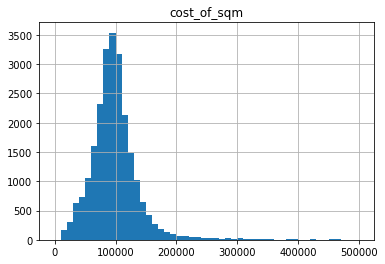

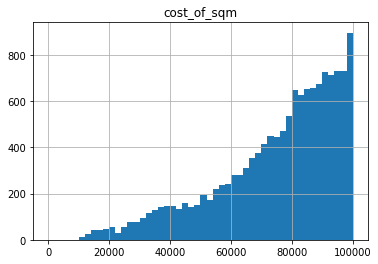

In [61]:
df.hist('cost_of_sqm', bins = 50, range=(0, 5e5)); #в пределах от 0 до 500000 рублей
df.hist('cost_of_sqm', bins = 50, range=(0, 1e5)); #в пределах от 0 до 100000 рублей

Действительно, наблюдаются доволно низкие цены за квадратный метр жилья, однако данные цены могут быть характерны для регионов. Проверим, сколько объявлений со стоимостью квадратного метра в Санкт-Петербурге меньше 20000 рублей.

In [62]:
df[(df.cost_of_sqm <20000) & (df.locality_name == 'Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,suspect,cost_of_sqm,date,floor_category,living_to_total_area,kitchen_to_total_area
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,False,...,805.0,0.0,NaN,8.0,False,111.834862,2019-03-20,последний,0.293578,0.371560
17753,12,1800000.0,117.3,2016-02-18T00:00:00,5,NaN,4,23.6,2,False,...,NaN,0.0,NaN,139.0,False,15345.268542,2016-02-18,другой,0.201194,0.109974
19952,7,2200000.0,138.7,2016-06-24T00:00:00,4,NaN,7,90.7,5,False,...,NaN,2.0,653.0,203.0,False,15861.571738,2016-06-24,другой,0.653929,0.098774
21338,15,3200000.0,190.0,2016-06-16T00:00:00,1,3.00,6,43.0,4,False,...,350.0,0.0,NaN,11.0,False,16842.105263,2016-06-16,другой,0.226316,0.068421
23394,10,1600000.0,92.0,2018-07-10T00:00:00,3,3.00,6,13.0,1,False,...,937.0,3.0,167.0,3.0,False,17391.304348,2018-07-10,первый,0.141304,0.108696


Данные объявления также являются подозрительными. Промаркируем их.

In [63]:
df.loc[(df.cost_of_sqm < 20000) & (df.locality_name == 'Санкт-Петербург'), 'suspect'] = True

### Вывод

Дополнительно были расчитаны такие показатели, как:
* Стоимость квадратного метра жилья
* Дата в формате год-месяц-день
* Отношение жилой площади к общей
* Отношение площади кухни к общей

На основании полученных расчётных данных был проведен дополнительный анализ аномальных значений и те объявления, которые кажутся "подозрительными" были дополнительно промаркированы в таблице.

## Исследовательский анализ данных

### Изучение распределений общей площади, цены, количества комнат и высоты потолков

Для начала изучим распределение столбцов: общая площадь, цена на момент снятия с публикации, количество комнат и высота потолков.

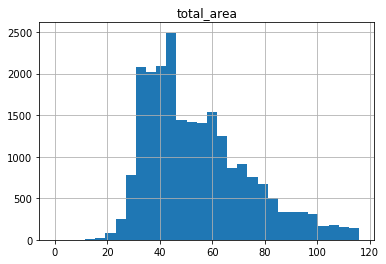

Среднее значение столбца total_area: 60.35
Медианное значение столбца total_area: 52.0


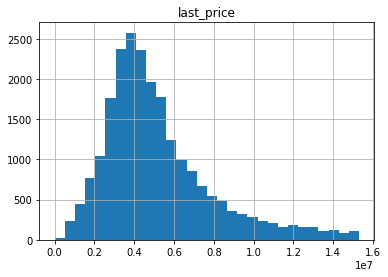

Среднее значение столбца last_price: 6541548.77
Медианное значение столбца last_price: 4650000.0


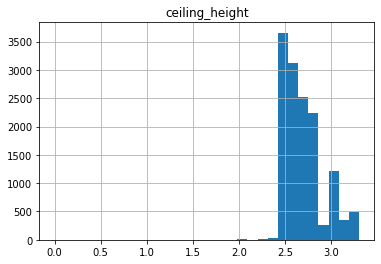

Среднее значение столбца ceiling_height: 2.77
Медианное значение столбца ceiling_height: 2.65


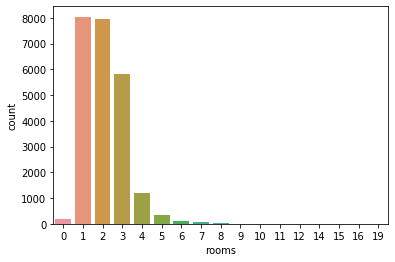

Среднее значение столбца rooms: 2.07
Медианное значение столбца rooms: 2.0


In [64]:
colquery_1 = ['total_area', 'last_price', 'ceiling_height']
for i in colquery_1:
    df.hist(i, bins = 30, range=(0, df[i].quantile(.95)))
    plt.show()
    print(f'Среднее значение столбца {i}: {round(df[i].mean(), 2)}')
    print(f'Медианное значение столбца {i}: {df[i].median()}')
sns.countplot(df.rooms);
plt.show()
print(f'Среднее значение столбца rooms: {round(df.rooms.mean(), 2)}')
print(f'Медианное значение столбца rooms: {df.rooms.median()}')

Проведем анализ каждой гистограммы отдельно:
1. Распределение total_area, в целом, выглядит вполне естественно, среднее значение смещено немного вправо от медианы. 
2. У распределения last_price среднее и медианное значения очень сильно отличаются, однако это можно объяснить тем, но на рынке недвижимости стоимость квартир в городе (а в городе дополнительная градация на "центр города" и "окраина") и области, как правило, сильно различается.
3. Распределение rooms, в целом, показывает реальную картину на рынке недвижимости. Больше всего на рынке недвижимости 1-комнатных квартир. Второе место по количеству комнат занимают двухкомнатные квартиры.
4. Распределение ceiling_total выглядит нормально, однако присутствуют аномальные значения.

### Исследование времени снятия объявления

Далее рассмотрим время продажи квартиры:

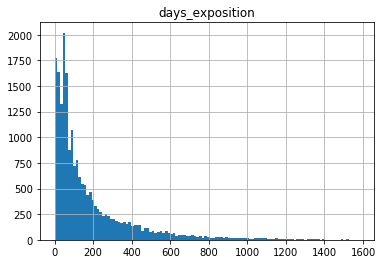

Среднее время продажи квартиры: 180.88863436982163
Медианное время продажи квартиры: 95.0


In [65]:
df.hist('days_exposition', bins='auto');
plt.show()
print(f'Среднее время продажи квартиры: {df.days_exposition.mean()}')
print(f'Медианное время продажи квартиры: {df.days_exposition.median()}')

Гистограмма выглядит вполне "естественно" и очень близка по виду к распределению Пуассона. Но в гистограмме наблюдаются несколько ярко выраженных пиков. Возможно, их природа связана с тем, что в какие-то временные интервалы объявление автоматически убирается с сайта, если нет дополнительных подтверждений, что оно актуально.

Другое странное наблюдение можно заметить, если рассмотреть среднее значение и медиану времени продажи квартиры. Они различаются практически в два раза. Можно сделать вывод, что большинство квартир продается в течение трёх месяцев, но среднее время продажи достигает почти полгода. Дополнительно рассмотрим данную величину в зависимости от стоимости продажи, возможно будет наблюдаться какая-то положительная корреляция:

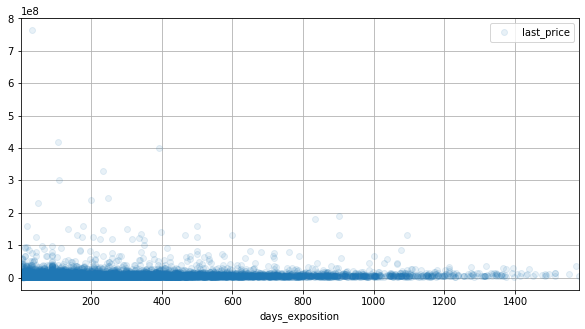

In [66]:
df.plot(x='days_exposition', y='last_price', style='o', grid=True, figsize=(10,5), alpha=0.1);

Получена довольно интересная закономерность. Стоимость квартиры практически никак не влияет на время продажи. Дополнительно рассмотрим зависимость времени продажи от даты публикации:

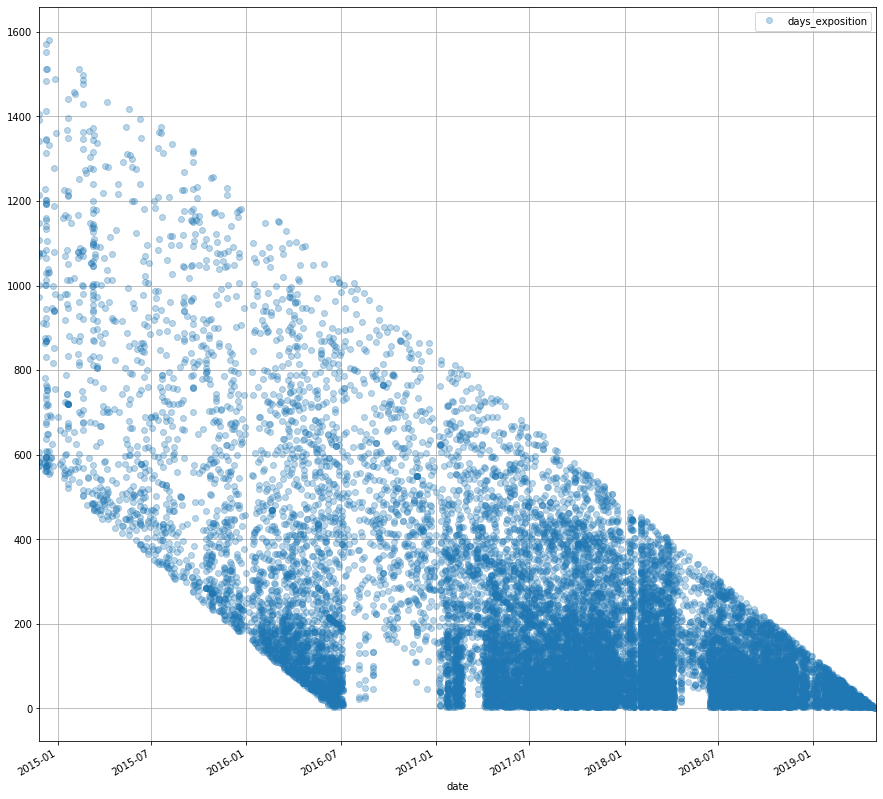

In [67]:
df.plot(x='date', y='days_exposition', style='o', grid=True, figsize=(15,15), alpha=0.3);

Здесь наблюдается еще более интересная закономерность. Чем позже дата публикации тем меньше времени времени занимала продажа. Причём дополнительно стоит обратить внимание на несколько закономерностей. Для этого рассмотрим некоторые участки графика отдельно:
* 2015.01 - 2016.01: наблюдвется тренд к снижению времени продажи и увеличению числа объявлений.
* 2016.01 - 2017.01: наблюдвется тренд к снижению времени продажи и увеличению числа объявлений, а также квартиры, размещенные на портале с 2016.07 до 2017.01 продавались значительно дольше, чем в другие месяцы данного периода.
* с 2017.01: также сохранятеся тренд к снижению времени продажи и увеличению числа объявлений и также наблюдаются некоторые "провалы" в середине каждого года, в которых возрастает время продажи.

Отсюда можно сделать вывод, что со временем наблюдается тренд в сторону "быстрых" продаж (то есть, в 2015 году объявления находились на сайте в диапазоне ~ от 2 до 5 лет, а в 2019 году в диапазоне ~ до полугода).

В целом, можно заключить, что некорректно сравнивать продолжительность продаж безотносительно даты публикации объявления.

Рассмотрим среднее и медиану для каждого временного интервала:

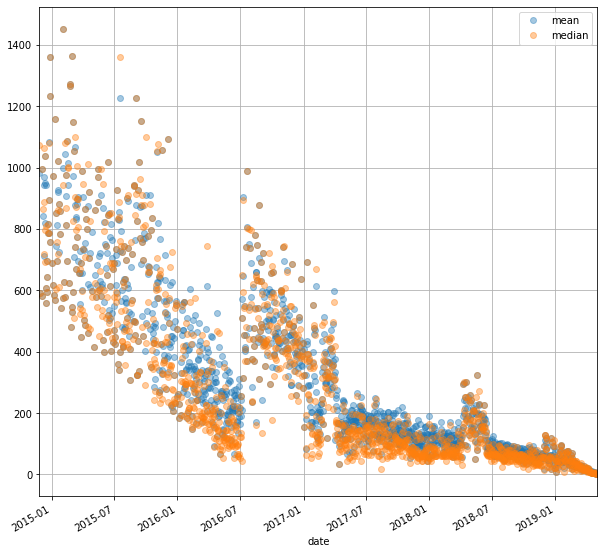

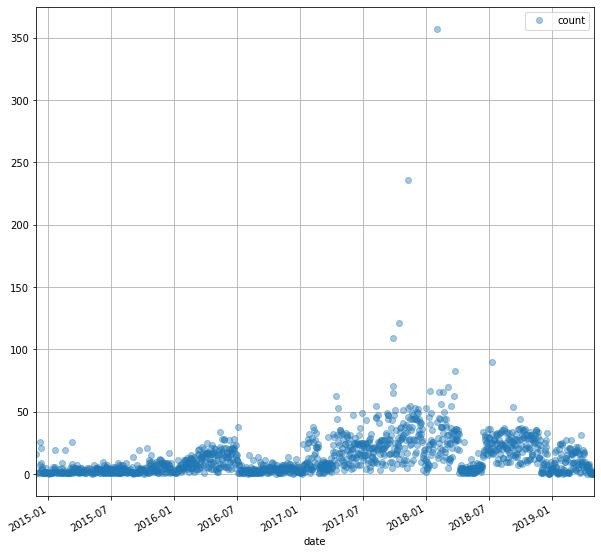

In [68]:
df_days_exp = df.pivot_table(index='date', values='days_exposition', aggfunc=['count', 'mean', 'median'])
df_days_exp.columns = ['count', 'mean', 'median']
df_days_exp.plot(y=['mean','median'], style='o', grid=True, figsize=(10,10), alpha=0.4);
df_days_exp.plot(y='count', style='o', grid=True, figsize=(10,10), alpha=0.4);

Выводы, которые были сформулированы для негруппированных данных подтверждены (при этом нетрудно заметить, что количество объявлений в сутки изменяется не очень существенно). 

Теперь исключим из рассмотрения данные, где время продажи превышает один год (данные объявления характерны для объявлений с датой публикации ранее 2016 года) или меньше десяти дней (как правило требуется какое-то время на согласование сделки и встречу покупателя с продавцом, поэтому слишком быстро снятые объявления выглядят подозрительно (дополнительно промаркируем их)).

Среднее время продажи квартиры: 111.5931279475715
Медианное время продажи квартиры: 83.0


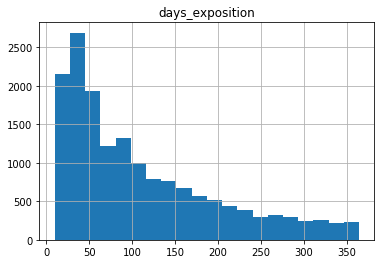

In [69]:
df.loc[(df.days_exposition < 10), 'suspect'] = True
df_days_exp_2 = df.query('days_exposition >= 10 and days_exposition < 365')
df_days_exp_2.hist('days_exposition', bins = 20);
print(f'Среднее время продажи квартиры: {df_days_exp_2.days_exposition.mean()}')
print(f'Медианное время продажи квартиры: {df_days_exp_2.days_exposition.median()}')

Теперь среднее и медианное время продажи квартиры находятся уже очень близко к друг-другу и можно сделать вывод, что большинство объявление снимается спустя 3-4 месяца после публикации.

### Исследование аномальных значений

Начнём исследование аномальных значиений со столбца total_images. Посмотрим на гистограмму, среднее и медианное значение:

Среднее количество фотографий: 9.858475041140977
Медианное количество фотографий: 9.0


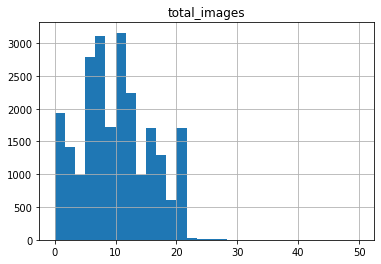

In [70]:
df.hist('total_images', bins=30);
print(f'Среднее количество фотографий: {df.total_images.mean()}')
print(f'Медианное количество фотографий: {df.total_images.median()}')

В среднем у каждого объявления 9-10 фотографий, аномальных значений не обнаружено.

Далее рассмотрим столбец last_price. Также выведем гистограмму, среднее и медианное значение:

Средняя цена продажи: 6541548.771551542
Медианная цена продажи: 4650000.0


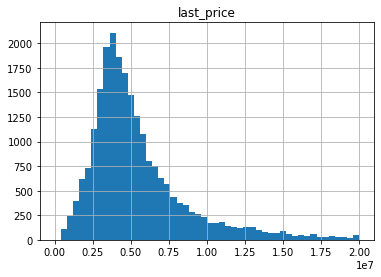

In [71]:
df.hist('last_price', bins = 50, range=(0, 20e6)); #в границах от 0 до 20 млн
print(f'Средняя цена продажи: {df.last_price.mean()}')
print(f'Медианная цена продажи: {df.last_price.median()}')

Значения выглядят корректно, однако, стоить обратить внимание на подозрительно низкие суммы сделок:

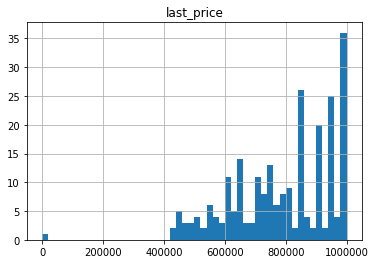

In [72]:
df.hist('last_price', bins = 50, range=(0, 1e6)); #в границах от 0 до 1 млн

Обнаружена сделка с нехарактерно низкой суммой. Промаркируем данное значение. 

In [73]:
df.loc[df.last_price < 200000, 'suspect'] = True

Сильное расхождение в среднем и медианном значении в данном столбце легко объясняется, так как есть определенное количество квартир, которые стоят очень дорого, именно эти из-за этих квартир среднее смещено. Более реальную картину рынка в данноми случае отражает медиана.

Исследуем столбец total_area. Проверим гистограмму, медианное и среднее значение количества комнат.

Средняя площадь жилья: 60.34865099793241
Медианная площадь жилья: 52.0


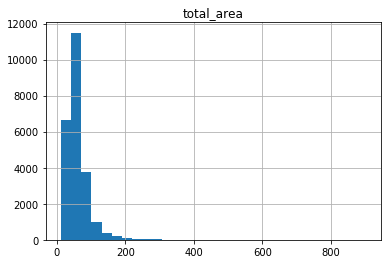

In [74]:
df.hist('total_area', bins=30);
print(f'Средняя площадь жилья: {df.total_area.mean()}')
print(f'Медианная площадь жилья: {df.total_area.median()}')

Дополнительно построим диаграмму размаха:

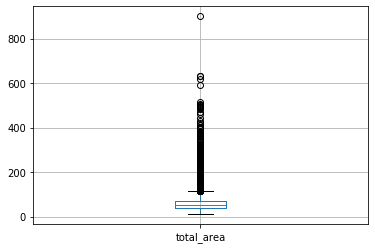

In [75]:
df.boxplot('total_area');

Столбец 'total_area' выглядит корректно. Есть очень высокие значения, однако они являются естественными (на рынке присутствует определенное количество квартир с большой площадью). 

Далее исследуем столбец rooms. Проверим гистограмму, медианное и среднее значение количества комнат.

Среднее количество комнат: 2.070635891809781
Медианное количество комнат: 2.0


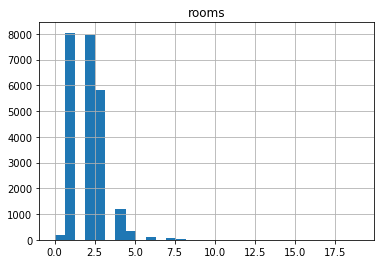

In [76]:
df.hist('rooms', bins=30);
print(f'Среднее количество комнат: {df.rooms.mean()}')
print(f'Медианное количество комнат: {df.rooms.median()}')

В столбце rooms присутствует значение 0. Проверим количество таких строк.

In [77]:
print(f'Количество строк с нулевым количеством комнат: {len(df.query("rooms == 0"))}')

Количество строк с нулевым количеством комнат: 197


Проверим взаимосвязь нулевого количества комнат с другими переменными:

In [78]:
df.loc[df.rooms == 0, 'total_images':'balcony'].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24,15.500000,2,False,True,False,7.104305,2
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14,17.000000,1,False,False,True,6.898941,0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17,24.750000,4,False,True,False,7.115600,2
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26,24.300000,19,False,False,True,7.864151,1
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10,13.527339,7,False,True,False,6.898941,0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25,17.500000,21,False,True,False,6.806528,0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9,12.000000,1,False,True,False,6.077486,0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18,14.183482,8,False,False,True,7.011891,1
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5,15.000000,3,False,False,True,7.925760,1
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27,18.000000,7,False,False,True,6.693578,2


Прослеживается взаимосвязь нулевого количества комнат с со столбцами open_plan, studio.

Оставим данные значения без изменений, так как некорректно считать количество комнат в квартирах со свободной планировкой или в студиях.

Рассмотрим столбец ceiling_height:

Среднее значение высоты потолка: 2.77149889685604
Медианное значение высоты потолка: 2.65


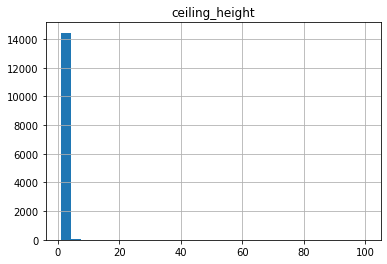

In [79]:
df.hist('ceiling_height', bins=30);
print(f'Среднее значение высоты потолка: {df.ceiling_height.mean()}')
print(f'Медианное значение высоты потолка: {df.ceiling_height.median()}')

Очевидно, что в столбце ceiling_height присутствуют аномальные значения. Для начала посмотрим на аномальные значения (за пределами \[Q1 - 1.5 * iqr; Q3 + 1.5 * iqr\] ). Воспользуемся методом `boxplot()` и посчитаем количество таких значений:

Количество строк с аномальными значениями высоты потолка: 828


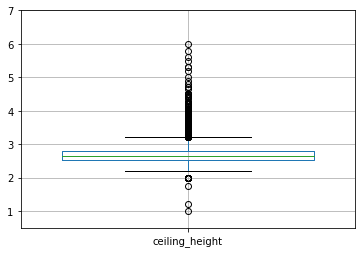

In [80]:
df.boxplot('ceiling_height');
plt.ylim(0.5, 7);
plt.xlim(0.9, 1.1);
q1 = 2.52
q3 = 2.8 
iqr = q3 - q1
print(f'Количество строк с аномальными значениями высоты потолка: '
      f'{len(df.query("ceiling_height <= (@q1 - 1.5 * @iqr) or ceiling_height >= @q3 + 1.5 * @iqr"))}')

Ограничим гистограмму и посмотрим на распределение:

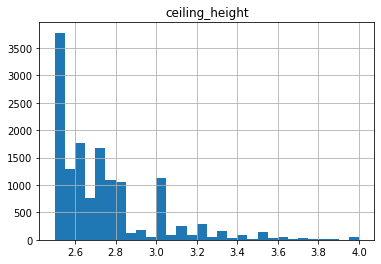

In [81]:
df.hist('ceiling_height', bins=30, range=(2.5,4));

Теперь видно более детально, что большая часть значений высоты потолка распределена около 2.5-3 метров, что и подтверждает среднее и медиана. Также на графике наблюдаются дополнительный пик около 3 метров и провал чуть меньше 3 метров. Этот провал, вероятнее всего, говорит о переходе на другой класс жилья. Аномальные значения, вероятнее всего, можно объяснить тем, что пользователь ошибся при заполнении данных.

Рассмотрим столбец floors_total:

Среднее значение количества этажей: 10.852820794126334
Медианное значение количества этажей: 9.0


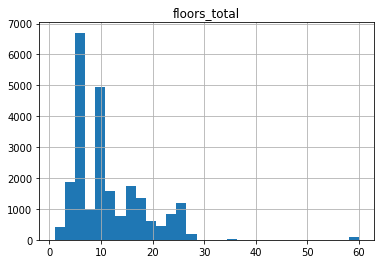

In [82]:
df.hist('floors_total', bins=30);
print(f'Среднее значение количества этажей: {df.floors_total.mean()}')
print(f'Медианное значение количества этажей: {df.floors_total.median()}')

На графике наблюдается два пика ~5 и ~9 этажей. Действительно, в городах России очень много типовой пяти- и девятиэтажной застройки, что и подтверждается гистограммой. Среднее смещено вправо из-за появления определенного количества высокоэтажных домов. В целом, распределение не противоречит здравому смыслу и выглядит естественно.

Рассмотрим столбец living_area:

Среднее значение жилой площади: 34.61258851270421
Медианное значение жилой площади: 30.0


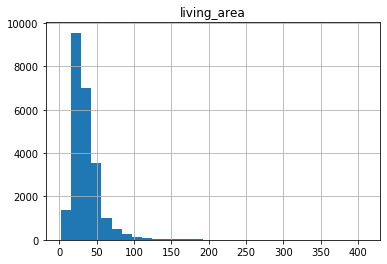

In [83]:
df.hist('living_area', bins=30);
print(f'Среднее значение жилой площади: {df.living_area.mean()}')
print(f'Медианное значение жилой площади: {df.living_area.median()}')

Распределение выглядит естественно, среднее значение незначительно смещено вправо из-за квартир, в которых жилая площадь очень большая. В данном столбце присутствуют подозрительно низкие значения жилой площади. Норма предоставления по местному закону составляет: на 1 человека — 33 кв.м., на 1 семейного гражданина — 18 кв.м. Аномальные значения могут быть вызваны ошибками или сознательным занижением значений пользователями при публикации объявлений. Пометим, как подозрительные объявления, жилая площадь в которых составляет менее 10 кв.м (дополнительно расширим интервал) и построим гистограмму без учета таких значений.

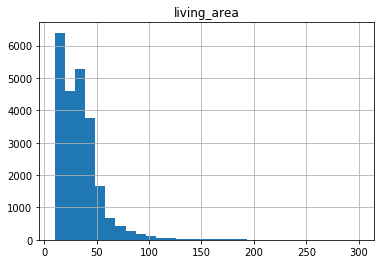

In [84]:
df.loc[df['living_area'] < 10, 'suspect'] = True
df.hist('living_area', bins=30, range=(10, 300));

In [85]:
len(df[df['living_area'] < 18])

4292

Подозрительные значения промаркированы, распределение стало отражать реальную картину на рынке недвижимости.

Исследуем столбец floor:

Среднее значение этажа квартиры: 5.892358327355584
Медианное значение этажа квартиры: 4.0


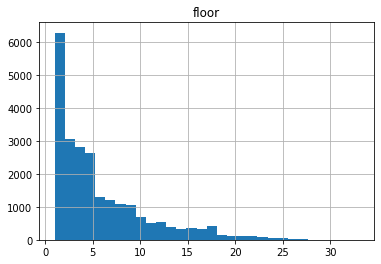

In [86]:
df.hist('floor', bins=30);
print(f'Среднее значение этажа квартиры: {df.floor.mean()}')
print(f'Медианное значение этажа квартиры: {df.floor.median()}')

Данное распределение выглядит корректно и согласуется со средним и медианным значением

Исследуем столбец kitchen_area:

Среднее значение кухонной площади: 10.52860776329308
Медианное значение кухонной площади: 9.1


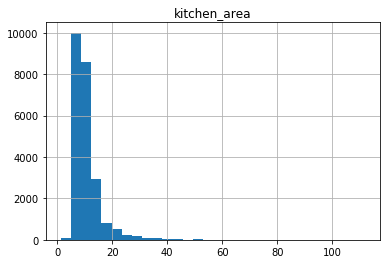

In [87]:
df.hist('kitchen_area', bins=30);
print(f'Среднее значение кухонной площади: {df.kitchen_area.mean()}')
print(f'Медианное значение кухонной площади: {df.kitchen_area.median()}')

По СНиП кухня не может быть менее 5 кв.м. Аномалии вызваны, вероятнее всего, ошибками пользователей при публикации объявлений. Промаркируем такие объявления и построим гистограмму без них:

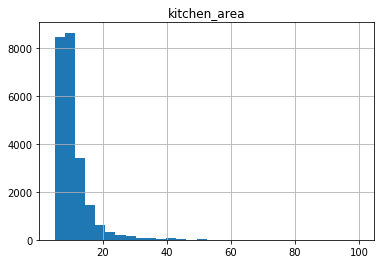

In [88]:
df.loc[df['kitchen_area'] < 5, 'suspect'] = True
df.hist('kitchen_area', bins=30, range=(5, 100));

Подозрительно низкие значения промаркированы, теперь гистограмма выглядит естественно.

Исследуем столбец balcony:

Среднее значение количества балконов: 0.5910797923963036
Медианное значение количества балконов: 0.0


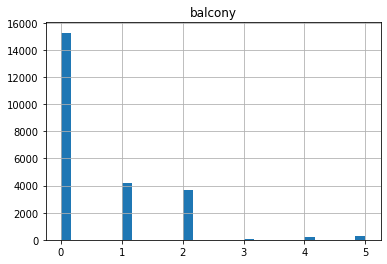

In [89]:
df.hist('balcony', bins=30);
print(f'Среднее значение количества балконов: {df.balcony.mean()}')
print(f'Медианное значение количества балконов: {df.balcony.median()}')

Здесь никаких аномалий или отклонений не наблюдается.

Далее исследуем на предмет аномалий картографические данные:

Среднее значение в столбце airports_nearest: 28793.67219254282
Медианное значение в столбце airports_nearest: 26726.0


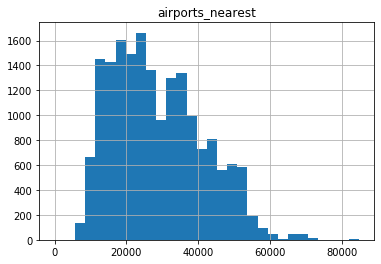

Среднее значение в столбце cityCenters_nearest: 14191.277832783278
Медианное значение в столбце cityCenters_nearest: 13098.5


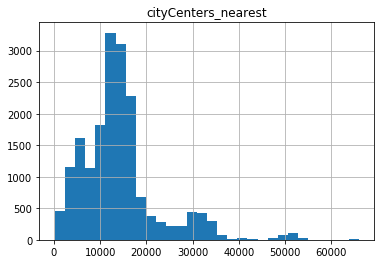

Среднее значение в столбце parks_nearest: 490.80455501918556
Медианное значение в столбце parks_nearest: 455.0


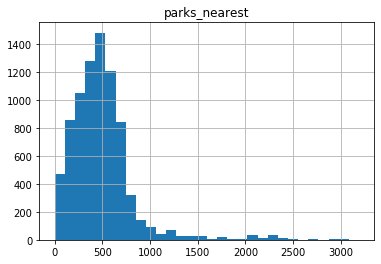

Среднее значение в столбце ponds_nearest: 517.9809001097694
Медианное значение в столбце ponds_nearest: 502.0


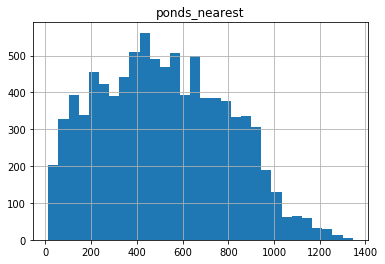

In [90]:
map_columns_hist = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']
for i in map_columns_hist:
    df.hist(i, bins=30)
    print(f'Среднее значение в столбце {i}: {df[i].mean()}')
    print(f'Медианное значение в столбце {i}: {df[i].median()}')
    plt.show()

Никаких аномальных значений в картографических данных не обнаружено.

Столбец days_exposition был исследован детально в п. 4.2

Осталось исследовать на предмент аномальных значений столбцы, которые были получены расчётным путем (частично подозрительные значения были обнаружены на этапе дополнительной обработки данных). Столбец cost_of_sqm был полностью обработан и изучен на предмет аномалий.

Рассмотрим столбцы living_to_total_area и kitchen_to_total_area:

Среднее значение в столбце living_to_total_area: 0.5651022819232331
Медианное значение в столбце living_to_total_area: 0.5690140845070422


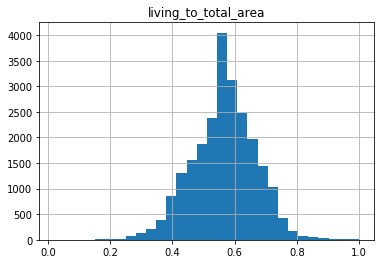

Среднее значение в столбце kitchen_to_total_area: 0.18878717807805773
Медианное значение в столбце kitchen_to_total_area: 0.1760797342192691


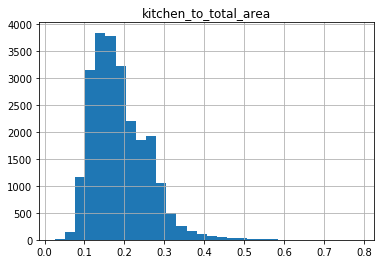

In [91]:
for i in ['living_to_total_area', 'kitchen_to_total_area']:
    df.hist(i, bins=30)
    print(f'Среднее значение в столбце {i}: {df[i].mean()}')
    print(f'Медианное значение в столбце {i}: {df[i].median()}')
    plt.show()

Подозрительными являются значения: жилой площади более 80%, а также менее 30%; кухонной площади менее 5% и более 80%, так как для жилой площади естественным является диапазон 50-70% (для дополнительной безопасности примем чуть более широкий диапазон). Для кухонной площади нет строгих рамок, однако промаркируем значения, которые выглядят неестественными. Такие значения могли появиться из-за ошибки заполнения пользователями связанных полей. В остальном, распределения выглядят взаимно-согласованными.

In [92]:
df.loc[(df['kitchen_to_total_area'] < 0.05) | (df['kitchen_to_total_area'] > 0.8), 'suspect'] = True
df.loc[(df['living_to_total_area'] < 0.3) | (df['living_to_total_area'] > 0.8), 'suspect'] = True

Исследование аномальных значений завершено. Проверим суммарное количество объявлений, в которых выявлены аномальные значения:

In [93]:
print(f'Количество наблюдений с аномальными значениями: {df.suspect.sum()}, '
      f'что составляет {round(df.suspect.sum() / len(df), 1) * 100}% от всего объема данных')

Количество наблюдений с аномальными значениями: 1697, что составляет 10.0% от всего объема данных


Был проведен исследовательский анализ всех столбцов, где это уместно, на выявление аномальных значений. Среди всего объема данных присутствует около 10% значений, которые выглядят аномальными.

### Влияние различных факторов на стоимость квартиры

Проведем исследовательский анализ различных факторов, которые влияют на стоииость квартиры.

Для начала разделим дату публикации объявления на отдельные составляющие: год, месяц, день недели.

In [94]:
def year_from_date(row):
    '''Функция принимает на вход строку датафрейма
    и возвращает значение года из столбца date'''
    
    return(row['date'].year)
def month_from_date(row):
    '''Функция принимает на вход строку датафрейма
    и возвращает значение месяца из столбца date'''
    
    return(row['date'].month)
def weekday_from_date(row):
    '''Функция принимает на вход строку датафрейма
    и возвращает значение дня недели (начиная с 1) 
    из столбца date'''
    
    return(row['date'].isoweekday())

df['year'] = df.apply(year_from_date, axis=1)
df['month'] = df.apply(month_from_date, axis=1)
df['weekday'] = df.apply(weekday_from_date, axis=1)

Все необходимые данные для многофакторного анализа теперь имеются в таблице. Выделим список факторов и исключим объявления с ярко выраженными аномалиями (ограничимся 90% квантилем):

In [95]:
factor_price = ['last_price', 'total_images', 'total_area', 'rooms', 'cityCenters_nearest',
                'year', 'month', 'weekday', 'floor_category']
df_factors = df.loc[df.suspect == False, factor_price] # исключили подозрительные объявления
df_factors = df_factors[(df_factors.last_price < df_factors.last_price.quantile(.9)) & # -- высокую стоимость
                       (df_factors.total_area < df_factors.total_area.quantile(.9)) & # -- большую площадь
                       (df_factors.cityCenters_nearest < df_factors.cityCenters_nearest.quantile(.9))] # -- далеко от центра
print(df_factors.corrwith(df_factors['last_price']))
df_factors.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median'])

last_price             1.000000
total_images           0.156089
total_area             0.767001
rooms                  0.474772
cityCenters_nearest   -0.355720
year                   0.061330
month                 -0.009399
weekday                0.001940
dtype: float64


,mean,median
,last_price,last_price
floor_category,,
другой,5.467570e+06,5057500.0
первый,4.919108e+06,4600000.0
последний,5.281227e+06,4800000.0


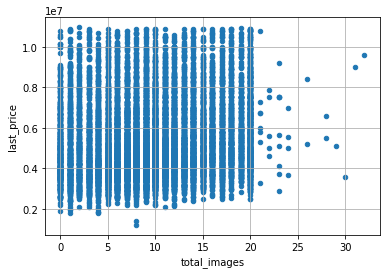

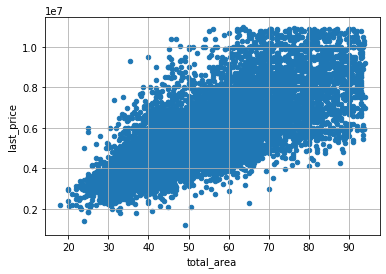

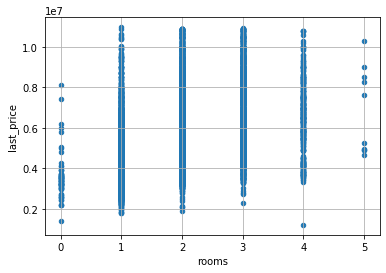

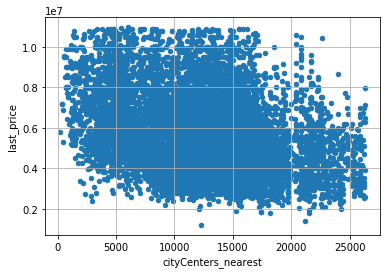

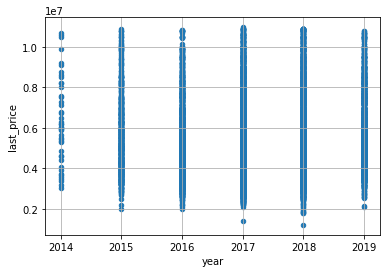

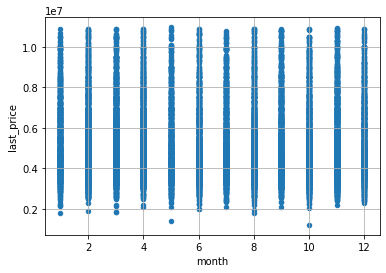

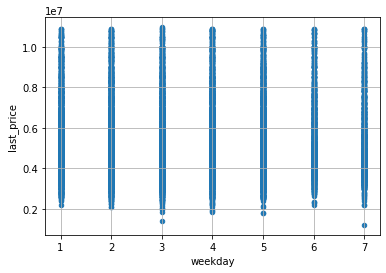

In [96]:
for i in factor_price[1:-1]:
    df_factors.plot(x=i, y='last_price', kind='scatter', grid=True)
    plt.show()

Проведем анализ полученных зависимостей:
1. total_images -> last_price: из коэффициента корреляции Пирсона (~0.16) следует, что цена слабо положительно коррелирует с количеством фотографий. Диаграмма рассеяние подтверждает это высказывание (нижние границы цен с увеличением количества фото незначительно смещаются вверх)
2. total_area -> last_price: ярко выраженная положительная корреляция между переменными. С увеличением площади увеличивается стоимость и разброс цен. Коэффициент корреляции Пирсона: ~0.77, что говорит о довольно сильной положительной корреляции факторов.
3. rooms -> last_price: c увеличением количества комнат растёт и цена. Из диаграммы рассеяния нетрудно заметить, что у квартир с нулевым количеством комнат(студии/со свободной планировкой) и у пятикомнатных квартир гораздо ниже разброс цен, чем у всех остальных. Коэффициент корреляции Пирсона: ~0.47, что говорит о средней положительной корреляции факторов.
4. cityCenters_nearest -> last_price: с увеличением отдаленности от центра цена уменьшается. Коэффициент корреляции Пирсона: ~ -0.36, что говорит о средней отрицательной корреляции факторов.
5. floor_category -> last_price: можно заключить, что квартиры на первом этаже самые дешевые, а стоимость квартир на последних этажах несколько ниже, чем на всех остальных (кроме первого).
6. year -> last_price: контринтуитивная зависимость. С течением времени по годам лишь немного изменяется разброс стоимостей квартир, однако не наблюдается тенденция к общему росту цен. Коэффициент корреляции Пирсона: ~0.06, что говорит о крайне слабой отрицательной корреляции факторов.
7. month -> last_price: в зависимости от месяца публикации цены и их диапазон практически не изменяются. Коэффициент корреляции Пирсона: ~0.009, что говорит о почти полностью отсуствующей корреляции между факторами.
8. weekday -> last_price: Коэффициент корреляции Пирсона: ~0.002, что говорит об отсуствующей корреляции между факторами, цены и диапазон практически не изменяются в зависимости от дня недели.

### Исследование населенных пунктов с наибольшим количеством объявлений

Для начала исследуем столбец locality_name на наличие неявных дубликатов:

In [97]:
df.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Действительно, встречаются неявные дубликаты. Для того, чтобы избавиться от них, извлечем из каждого названия только слова, начинающиеся с заглавной буквы:

In [98]:
def name_of_locality(value):
    return(' '.join(str(e) for e in re.findall(r'\b[А-Я]\w+\b', value)))
df['locality_name_cor'] = df['locality_name'].apply(name_of_locality)

Рассмотрим 10 населенных пунктов с наибольшим количеством объявлений (сразу исключим подозрительные объявления):

In [99]:
top_loc = df[df.suspect == False].pivot_table(index='locality_name_cor', values='cost_of_sqm', 
               aggfunc=['count', 'median', 'mean'])
top_loc.columns = ['count', 'median', 'mean']
top_loc = top_loc.sort_values(by='count', ascending=False)
top_loc = top_loc.head(10)
top_loc = top_loc.style.highlight_max(axis=0, color='yellow').highlight_min(axis=0, color='lightblue')
top_loc


,count,median,mean
locality_name_cor,,,
Санкт Петербург,14554,104615,114483
Мурино,521,85582.3,85693.9
Кудрово,429,95840.9,95150.5
Шушары,417,76829.3,78461.8
Всеволожск,376,65811.4,68759.3
Пушкин,343,100000,103047
Колпино,316,74689.9,75377.2
Парголово,300,91145.2,89665.2
Гатчина,280,67671.5,68642.6


Среди данных населенных пунктов минимальная средняя стоимость квадратного метра в Выборге, а максимальная в Санкт-Петербурге.

Нетрудно заметить, что подавляющее большинство размещенных объявлений относятся к Санкт-Петербургу.

### Определение центральной области Санкт-Петербурга

Построим график изменения средней цены для Санкт-Петербурга для определения области с нехарактерным изменением цен (данная область будет считаться центром). Исключим из рассмотрения подозрительные объявления.

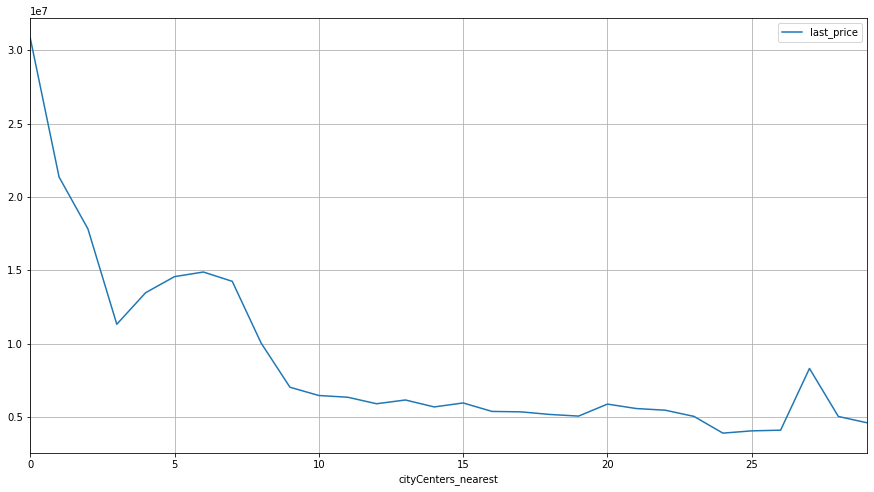

In [100]:
df_center_price_spb = df.loc[(df.locality_name == 'Санкт-Петербург') & 
                             (df.suspect == False), ['last_price', 'cityCenters_nearest']]
df_center_price_spb['cityCenters_nearest'] = round(df_center_price_spb['cityCenters_nearest'] / 1000, 0)
df_center_price_spb.head()
df_center_center_price_spb_gr = df_center_price_spb.pivot_table(index='cityCenters_nearest',
                                                               values='last_price', aggfunc='mean')
df_center_center_price_spb_gr.plot(grid=True, figsize=(15,8));

На графике выделяются несколько характерных изменений:
1. Резкий рост начинается на 9 км, к 4 км наблюдается небольшое снижение (в дальнейшем, зафиксируем отметку 9 км, которую примем, как переход в центральную зону Санкт-Петербурга).
2. Очень сильный рост цен начинается начинается с 3 км (по всей видимости, данный переход является историческим центром Санкт-Петербурга).

### Анализ квартир в центре Санкт-Петербурга

Для начала выделим несколько основных срезов данных, исключая подозрительные:
1. Весь Санкт-Петербург
2. Центральная область Санкт-Петербурга (не включая исторический центр).
3. Исторический центр Санкт-Петербурга

Для начала, подготовим данные для выделения областей:

In [101]:
factors_for_spb = ['last_price', 'total_images', 'total_area', 
     'ceiling_height', 'rooms', 'floor', 'balcony', 'airports_nearest', 
     'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'cost_of_sqm',
     'year', 'month']
df_for_regions = df.loc[(df.suspect == False) & (df.locality_name == 'Санкт-Петербург'), factors_for_spb]
df_for_regions = df_for_regions[(df_for_regions.last_price < df_for_regions.last_price.quantile(.98)) &
                               (df_for_regions.total_area < df_for_regions.total_area.quantile(.95)) &
                               (df_for_regions.cityCenters_nearest < df_for_regions.cityCenters_nearest.quantile(.95)) &
                               (df_for_regions.ceiling_height < df_for_regions.ceiling_height.quantile(.95))]
print('Количество объявлений в "очищенном" массиве данных', len(df_for_regions))

Количество объявлений в "очищенном" массиве данных 8081


Мы потеряли чуть меньше половины данных по Санкт-Петербургу, но при этом дальнейшие выводы и зависимости будут более наглядными.

In [102]:
spb = df_for_regions
spb_center = spb.query('cityCenters_nearest < 9000 and cityCenters_nearest > 3000')
spb_hcenter = spb.query('cityCenters_nearest <= 3000')

Далее рассмотрим основные факторы стоимости квартиры в каждой выделенной области:

In [103]:
stat_1 = pd.DataFrame({'count':[len(spb), len(spb_center), len(spb_hcenter)],
                     'last_price':[spb.last_price.median(), spb_center.last_price.median(), spb_hcenter.last_price.median()],
                     'total_area':[spb.total_area.median(), spb_center.total_area.median(), spb_hcenter.total_area.median()],
                     'ceiling_height':[spb.ceiling_height.median(), spb_center.ceiling_height.median(), spb_hcenter.ceiling_height.median()],
                     'rooms':[spb.rooms.median(), spb_center.rooms.median(), spb_hcenter.rooms.median()]},
                     index=['spb','spb_center', 'spb_hcenter'])
stat_1

,count,last_price,total_area,ceiling_height,rooms
spb,8081,5490000.0,54.0,2.65,2.0
spb_center,1698,7600000.0,66.5,2.95,2.0
spb_hcenter,227,8800000.0,77.3,3.00,3.0


Наблюдается логичная закономерность, что при приближении к центру Санкт-Петербурга возрастает медианная стоимость, медианное значение высоты потолка, медианное значение общей площади квартир, а также уменьшается количество объявлений. Медианное количество комнат в центральной области и во всем Санкт-Петербурге меньше, чем в историческом центре.

Рассмотрим влияние разных параметров на цены в каждой из выделенных областей, а также построим гистограммы для ключевых показателей:

In [104]:
stat_2 = pd.DataFrame({'spb': spb.corrwith(spb.last_price),
              'spb_center': spb_center.corrwith(spb_center.last_price),
              'spb_hcenter': spb_hcenter.corrwith(spb_hcenter.last_price)})
stat_2

,spb,spb_center,spb_hcenter
last_price,1.000000,1.000000,1.000000
total_images,0.142781,0.148937,0.203996
total_area,0.791780,0.701164,0.598715
ceiling_height,0.492233,0.298609,0.173387
rooms,0.457559,0.358735,0.283458
floor,0.075118,0.128486,0.128737
balcony,0.054119,0.103444,0.060685
airports_nearest,0.002679,0.016304,0.248121
cityCenters_nearest,-0.384413,-0.165794,-0.129964
parks_nearest,0.059638,0.088939,0.107323


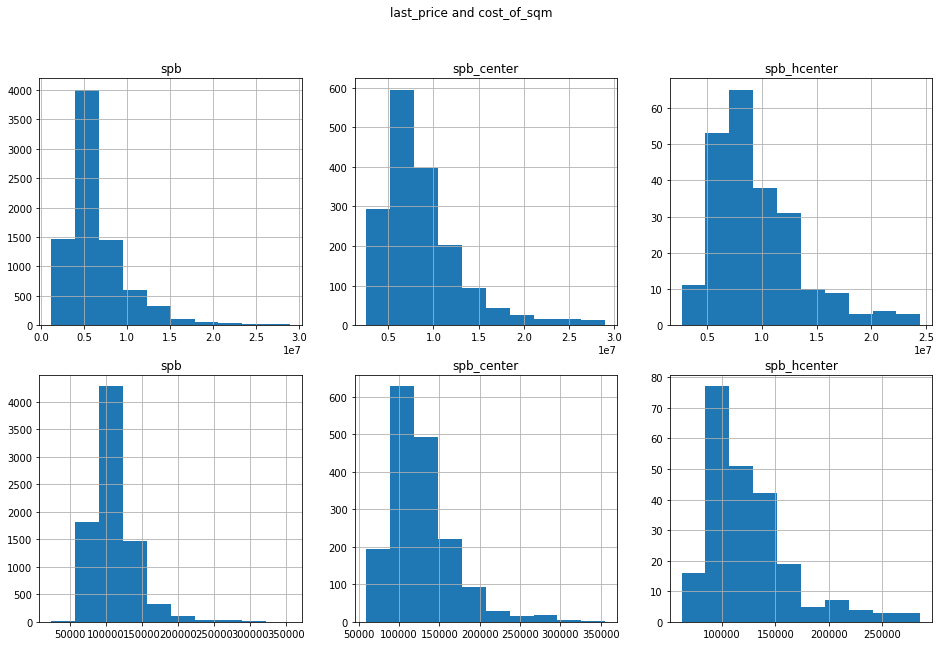

In [105]:
fig, ax = plt.subplots(2, 3);
fig.suptitle('last_price and cost_of_sqm');
ax[0, 0].hist(x=spb.last_price);
ax[0, 1].hist(x=spb_center.last_price);
ax[0, 2].hist(x=spb_hcenter.last_price);
ax[1, 0].hist(x=spb.cost_of_sqm);
ax[1, 1].hist(x=spb_center.cost_of_sqm);
ax[1, 2].hist(x=spb_hcenter.cost_of_sqm);
ax[0, 0].set_title('spb')
ax[0, 1].set_title('spb_center')
ax[0, 2].set_title('spb_hcenter')
ax[1, 0].set_title('spb')
ax[1, 1].set_title('spb_center')
ax[1, 2].set_title('spb_hcenter')
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()
fig.set_figwidth(16)
fig.set_figheight(10)


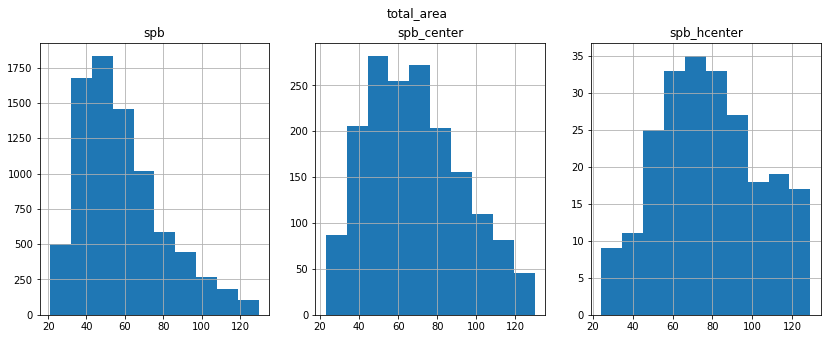

In [106]:
fig, ax = plt.subplots(1, 3);
fig.suptitle('total_area');
ax[0].hist(x=spb.total_area);
ax[1].hist(x=spb_center.total_area);
ax[2].hist(x=spb_hcenter.total_area);
ax[0].set_title('spb')
ax[1].set_title('spb_center')
ax[2].set_title('spb_hcenter')
ax[0].grid()
ax[1].grid()
ax[2].grid()
fig.set_figwidth(14)
fig.set_figheight(5)

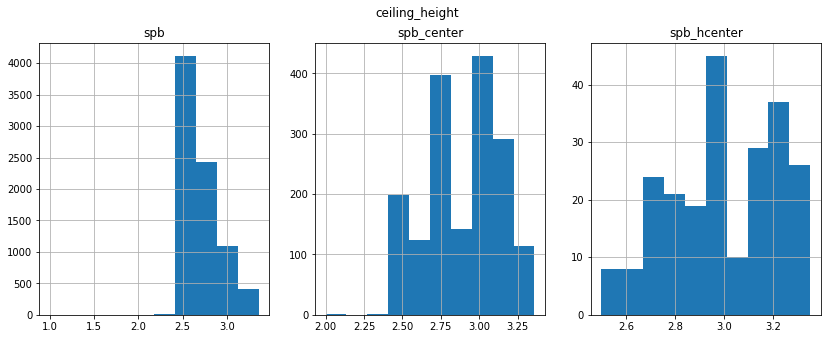

In [107]:
fig, ax = plt.subplots(1, 3);
fig.suptitle('ceiling_height');
ax[0].hist(x=spb.ceiling_height);
ax[1].hist(x=spb_center.ceiling_height);
ax[2].hist(x=spb_hcenter.ceiling_height);
ax[0].set_title('spb')
ax[1].set_title('spb_center')
ax[2].set_title('spb_hcenter')
ax[0].grid()
ax[1].grid()
ax[2].grid()
fig.set_figwidth(14)
fig.set_figheight(5)

По мере уменьшение области исследования проявляются интересные закономерности:
1. Распределение конечной стоимости жилья и стоимости за квадратный метр смещаются вправо, что говорит о том, что цены в центре выше.
2. Общая площадь жилья также смещается вправо, что говорит о том, что по мере приближения к центру площадь увеличивается.
3. Ситуация с высотой потолков аналогичная, хотя центр без учета исторического центра и исторический центр между собой различаются незначимо.
4. По мере приближения к центру: 
    * на стоимость квартиры начинает сильнее влиять количество фотографий в объявлении.
    * уменьшается влиятние общей площади на стоимость квартиры.
    * уменьшается влияние высоты потолков на стоимость квартиры.
    * уменьшается влияние числа комнат на стоимость квартиры
    * сильно увеличивается значимость удаленности от аэропорта в ценообразовании
    * ослабевает отрицательная корреляция между стоимостью квартиры и удаленностью от центра города
    * остальные параметры незначимо изменяют корреляцию со стоимостью квартиры


## Общий вывод

В ходе работы были выполнены следующие этапы:
1. Проведен общий обзор данных и выделены основные проблемы.
2. Проведена предварительная обработка данных и обработаны пропущенные значения.
3. Расчитаны дополнительные метрики.
4. Проведен исследовательский анализ данных и размечены данные с аномальными значениями различных показателей.

Основные выводы:
1. Фактор общей площади квартиры наиболее сильно положительно коррелирует со стоимостью квартиры.
2. Большинство объявлений снимаются с публикации в течение 3-4 месяцев.
3. Большинство квартир из набора данных располагаются в Санкт-Петербурге.
4. Средние значения стоимости квартир, количества комнат, высоты потолков и общей площади квартир в центре Санкт-Петербурга выше, чем значения по городу "в целом".
5. Корреляция различных факторов со стоимостью квартиры в центре Санкт-Петербурга сильно отличается от корреляции тех же факторов по городу "в целом".
6. Необходимо добавить в функционал пользовательского интерфейса дополнительные проверки на вводимые данные, это может помочь уменьшить количество пропущенных значений и добавить точности исследованиям.